In [12]:
import openml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
datasets_df = openml.datasets.list_datasets(output_format="dataframe")
datasets_df.head(n=5)

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0


In [8]:
# Iris dataset https://www.openml.org/d/31
dataset = openml.datasets.get_dataset(31)

# Print a summary
print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'credit-g', the target feature is 'class'
URL: https://www.openml.org/data/v1/download/31/credit-g.arff
**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1 (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are ba


In [11]:
# X - An array/dataframe where each row represents one example with
# the corresponding feature values.
# y - the classes for each example
# categorical_indicator - an array that indicates which feature is categorical
# attribute_names - the names of the features for the examples (X) and
# target feature (y)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute
)
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes
996,<0,30,existing paid,used car,3857.0,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes
997,no checking,12,existing paid,radio/tv,804.0,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes
998,<0,45,existing paid,radio/tv,1845.0,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes


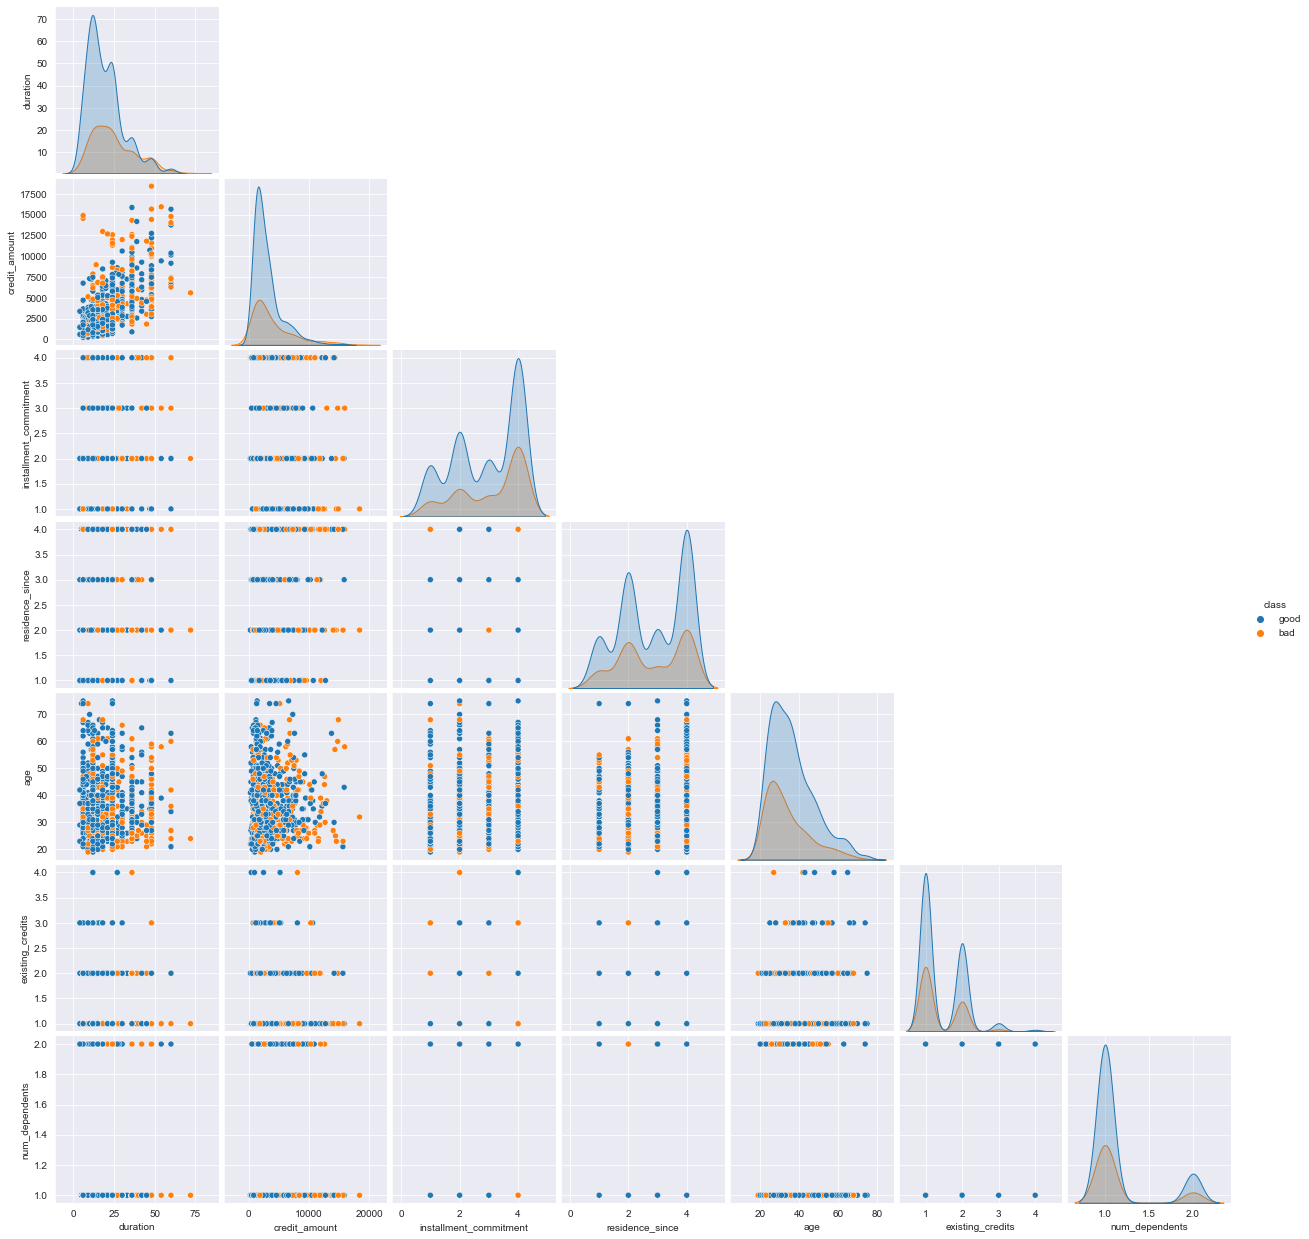

In [15]:
sns.set_style("darkgrid")


def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)


# We combine all the data so that we can map the different
# examples to different colors according to the classes.
combined_data = pd.concat([X, y], axis=1)
iris_plot = sns.pairplot(combined_data, hue="class")

iris_plot.map_upper(hide_current_axis)

plt.savefig("dataset.png")
plt.show()
